# Algorithm combination (Sobel, Magnitud & Direction)

In [1]:
# Importing Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [2]:
# Read in an image
#image = mpimg.imread('signs_vehicles_xygrad.jpg')
image = cv2.imread('signs_vehicles_xygrad.jpg')

# Convert to RGB
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Converto RGB to gray
gray = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)

In [3]:
# Params for Sobel
ksize = 3
thresh_min = 20
thresh_max = 100

## Helper Functions

In [4]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=ksize, thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

def mag_thresh(img, sobel_kernel=ksize, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return mag_binary

def dir_threshold(img, sobel_kernel=ksize, thresh=(0, np.pi/2)):
    # Convert to grayscale
    gray = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    dir_binary =  np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return dir_binary

In [5]:
# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(thresh_min, thresh_max))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(thresh_min, thresh_max))
mag_binary = mag_thresh(image, sobel_kernel = 9, mag_thresh = (30,100))
dir_binary = dir_threshold(image, sobel_kernel= 3, thresh = (0.7, 1.3))

# Combined Output
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

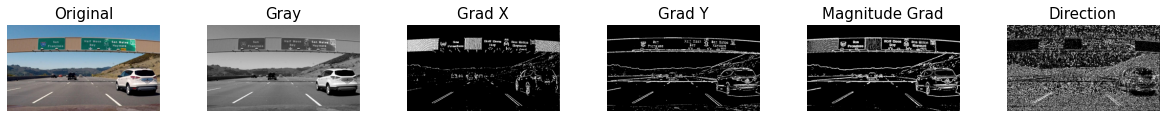

In [31]:
# Plot the result
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize=(16, 6))
f.tight_layout()
ax1.set_axis_off() # Hide Axes
ax1.imshow(RGB_img,cmap = 'gray')
ax1.set_title('Original', fontsize=15)
ax2.set_axis_off() # Hide Axes
ax2.imshow(gray, cmap='gray')
ax2.set_title('Gray', fontsize=15)
ax3.set_axis_off() # Hide Axes
ax3.imshow(gradx, cmap='gray')
ax3.set_title('Grad X', fontsize=15)
ax4.set_axis_off() # Hide Axes
ax4.imshow(grady, cmap='gray')
ax4.set_title('Grad Y', fontsize=15)
ax5.set_axis_off() # Hide Axes
ax5.imshow(mag_binary, cmap='gray')
ax5.set_title('Magnitude Grad', fontsize=15)
ax6.set_axis_off() # Hide Axes
ax6.imshow(dir_binary, cmap='gray')
ax6.set_title('Direction', fontsize=15)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Text(0.5, 1.0, 'Combined')

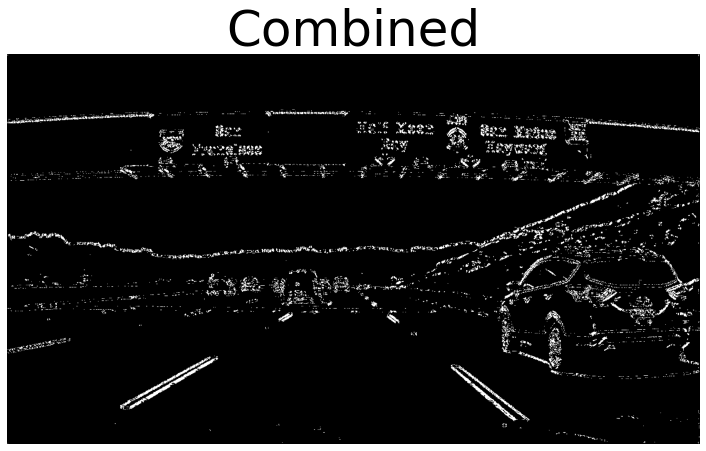

In [7]:
# Combined
f, (comb) = plt.subplots(1, 1,  figsize=(16, 6))
f.tight_layout()
comb.set_axis_off() # Hide Axes
comb.imshow(combined,cmap = 'gray')
comb.set_title('Combined', fontsize=50)